# Develope a Model to predict if there will be Purchase or not

My task here is to recommend the marketing team a better set of possible customers to focus on who have higher chance of purchasing based on given features. Inorder to achieve that, I need to train my ML algorithm on given dataset and train a model based on mapping of input features and target output, which in my case is given set of input feature vectors does a client does a purchase or Not.

One thing needs to be clear before I proceed ahead is that my problem statement is a Classification problem, where given training sample I will tune my model to test on unknown samples.

I will be breaking the entire working into following stages:

1] Read Dataset

2] Check Balanced or Imbalanced data (based on target labels)

3] Treat the Imbalanced Data (Doing Re-Sampeling)

4] Pre-Processing: 
   - Repair my dataset for any breakdowns or missing values in dataset
   - Convert categorical features to numeric

5] Spliting the new processed data in to Train-Test data

6] Decide on an ML algos for training our Model

    6.1] Testing the models
    6.2] Evaluating the models

7] Plotting the Evaluation Metric of different ML algos

Lets start by importing packages and libraries for graph display, I use %inline to show graph in same notebook window

## Imports

In [1]:
import numpy as np
import sklearn
import pandas as pd

from sklearn.metrics import accuracy_score,classification_report

#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns


## Read Dataset

In [2]:

df = pd.read_csv('DataScienceChallenge.csv',sep=',')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Purchase
0,10,21,28,E,19.98,5,189.88,9,2305,10,500.0,3,31,1000.0,A,0
1,10,22,46,D,15.98,6,68.95,29,609,10,250.0,8,16,100.0,B,0
2,10,23,38,E,12.29,3,36.00,3,648,U,200.0,4,2,250.0,A,0
3,5,20,25,E,21.48,2,26.45,1,3250,U,200.0,14,13,500.0,B,0
4,10,17,33,E,15.96,7,13.95,29,873,U,200.0,14,10,500.0,A,0


- The above dataset contains some numerical features whereas some categorical features and a target label as 'Purchase' which has values 0 or 1. 

- Let's first check if the data is balanced or not

C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


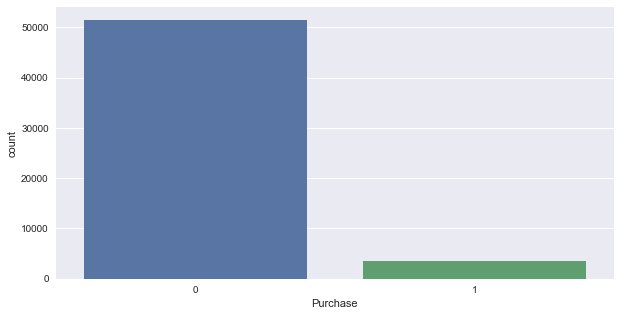

In [3]:
# set seaborn graph size
sns.set(rc={'figure.figsize':(10,5)})

#plot the graph
sns.countplot(x='Purchase',data=df)

#### Lets consider Purchase == 0 as (Yes purchased) and Purchase == 1 as (Not Purchase)


* So the number of records for Purchase are almost <b>90 % </b> of total data and the Not purchase are approx <b>10 % </b>

* Hence there is <b>lot of imbalance.</b> Let's confirm it

In [4]:
purchased = df[df.Purchase==0]

purchased.shape

(51448, 16)

In [5]:
not_purchased = df[df.Purchase==1]

not_purchased.shape

(3620, 16)

## Treating the Imbalanced Data

I will follow the Data Level Approach to treat the Imbalanced Data by using Re-Sampeling technique (Random Under-Sampeling)

<b> Random Under-Sampeling - It aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out. </b> [1]

- So here I will sample random data from purchased section to balance with non_purchased data

In [6]:
purchased1 = purchased.sample(n=5000,random_state=2)
purchased1.shape

(5000, 16)

In [7]:
balanced_data = not_purchased.append(purchased1,ignore_index=True)

In [8]:
balanced_data.shape

(8620, 16)

C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


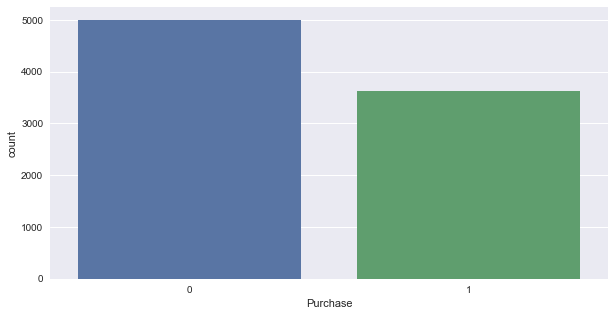

In [9]:
sns.countplot(x='Purchase',data=balanced_data)

In [10]:
balanced_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Purchase
0,2,18,49,J,13.89,9,8.45,1,1231,U,250.0,14,5,250.0,A,1
1,3,18,27,J,14.22,7,23.45,4,832,U,250.0,10,5,500.0,B,1
2,3,18,27,J,14.22,7,23.45,4,1005,U,250.0,10,5,500.0,B,1
3,1,17,35,E,19.10,9,13.95,1,1328,14,225.0,14,9,600.0,B,1
4,2,18,33,K,15.98,4,7.00,1,1229,U,200.0,12,6,0.0,A,1


## Pre-Processing

In [11]:
# check the statistics for the numerical values
balanced_data.describe()

,x1,x3,x5,x6,x7,x8,x9,x11,x12,x13,x14,Purchase
count,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8620.000000,8084.000000,8620.000000
mean,8.674594,35.962993,17.289042,5.025870,56.953290,10.865081,957.777030,345.323788,9.107425,12.598724,331.438644,0.419954
std,2.416880,9.381556,4.629677,3.506962,61.449011,11.492276,519.560806,175.495870,4.065774,8.750456,233.765832,0.493580
min,1.000000,20.000000,6.980000,0.000000,3.000000,0.000000,280.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,29.000000,13.960000,2.000000,15.450000,1.000000,580.000000,209.487500,6.000000,6.000000,200.000000,0.000000
50%,10.000000,34.000000,15.980000,5.000000,33.950000,5.000000,849.000000,300.000000,10.000000,11.000000,250.000000,0.000000
75%,10.000000,40.000000,19.950000,8.000000,75.700000,22.000000,1199.000000,500.000000,12.000000,16.000000,500.000000,1.000000
max,10.000000,75.000000,62.080000,15.000000,800.000000,60.000000,4380.000000,1250.000000,15.000000,48.000000,1000.000000,1.000000


From the above cell I can observe that feature x2,x4,x10 and x15 contains some non numeric/categorical values.

Let's confirm all the unique values from these features

In [12]:
balanced_data['x2'].unique()

# here I can see there are some missing values named as 'Unknown'

array(['18', '17', '20', '22', '15', '16', '21', '19', '24', '23', '26',
       '25', '30', 'Unknown', '14', '29', '31'], dtype=object)

In [13]:
balanced_data['x4'].unique() 

# Here I can see we have nan values in these feature

array(['J', 'E', 'K', 'H', 'A', 'I', 'G', 'C', 'D', 'B', 'F', nan], dtype=object)

In [14]:
balanced_data['x10'].unique()

# here I can see there are some missing values named as 'U'

array(['U', '14', '6', '10', '5', '0', '1', '12', '4', '7', '3', '8', '2',
       '9', '13', '11'], dtype=object)

In [15]:
balanced_data['x15'].unique()

# here I can see this feature has categorical values

array(['A', 'B'], dtype=object)

In [16]:
# check how many null values are present in our dataframe

balanced_data.isnull().sum()

x1            0
x2            0
x3            0
x4           21
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14         536
x15           0
Purchase      0
dtype: int64

<b> Except these Null values from the above result, there are some other missing values that are designated using other strings like 'U' or 'Unknown' as found from the above cells. Let's replace all these values and bring them to null values using Numpy package built-in function 'np.NaN'

In [17]:
balanced_data = balanced_data.replace('U',np.NaN)
balanced_data = balanced_data.replace('Unknown',np.NaN)
balanced_data.isnull().sum()

x1             0
x2            38
x3             0
x4            21
x5             0
x6             0
x7             0
x8             0
x9             0
x10         3526
x11            0
x12            0
x13            0
x14          536
x15            0
Purchase       0
dtype: int64

### Observations from above:

- We can see that out of total 8620 records the feature x2,x10,x14 (numeric variables) have missing values.

- Even the feature x4 (categorical feature) also have missing values.

- It is important to treat these missing values because these missing values can affect power of model and may lead to biased model and also result false/wrong predictions or classification. 

- In this case , we can choose either doing data imputation or dropping the missing value records or dropping the whole feature.

- For x2 and x4 , I will drop these NA values as they are in very less numbers and they wont affect the amount of data.

- For x10 and x14 I will replace the NA values using data imputation i.e replacing them with respective mean/median/mode of that specific columns because removing them can cause decrease in amount of data.


In [18]:
# dropping NA values from x4 and x2 features

balanced_data =  balanced_data.dropna(subset=['x4','x2'])
balanced_data.reset_index()
balanced_data.isnull().sum()

x1             0
x2             0
x3             0
x4             0
x5             0
x6             0
x7             0
x8             0
x9             0
x10         3496
x11            0
x12            0
x13            0
x14          488
x15            0
Purchase       0
dtype: int64

In [19]:
# Below filling of missing values can be done in multiple ways of data imputation as discussed

# lets replace x10 feature by finding the median of its column values
balanced_data['x10'] = balanced_data['x10'].fillna((balanced_data['x10'].median()))

# lets replace x14 feature by finding the mean of its column values
balanced_data['x14'] = balanced_data['x14'].fillna((balanced_data['x14'].mean()))



In [20]:
# I will transfer all the above pre-processed data to a new dataframe for further processing

new_balanced_data=balanced_data

In [21]:
# Lets check again if we have no null/NA values left in our data
new_balanced_data.isnull().sum()

x1          0
x2          0
x3          0
x4          0
x5          0
x6          0
x7          0
x8          0
x9          0
x10         0
x11         0
x12         0
x13         0
x14         0
x15         0
Purchase    0
dtype: int64

In [22]:
new_balanced_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Purchase
0,2,18,49,J,13.89,9,8.45,1,1231,9,250.0,14,5,250.0,A,1
1,3,18,27,J,14.22,7,23.45,4,832,9,250.0,10,5,500.0,B,1
2,3,18,27,J,14.22,7,23.45,4,1005,9,250.0,10,5,500.0,B,1
3,1,17,35,E,19.10,9,13.95,1,1328,14,225.0,14,9,600.0,B,1
4,2,18,33,K,15.98,4,7.00,1,1229,9,200.0,12,6,0.0,A,1


#### That is great, looks like I dont have any null values, so I will proceed for converting categorial values to numerical using LabelEncoder

Note: This is a optional step just to bring all of our data into single representation. However, it is also possible to proceed with mixed type data. I would like to continue with single representation as I believe I will get good results.

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


SKLPP = preprocessing.LabelEncoder()
#THEN COVERTING SPECIFIC CATEGORIAL COLUMNS TO VALUES
new_balanced_data.x4 = SKLPP.fit_transform(new_balanced_data.x4)
new_balanced_data.x15 = SKLPP.fit_transform(new_balanced_data.x15)

In [24]:
new_balanced_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Purchase
0,2,18,49,9,13.89,9,8.45,1,1231,9,250.0,14,5,250.0,0,1
1,3,18,27,9,14.22,7,23.45,4,832,9,250.0,10,5,500.0,1,1
2,3,18,27,9,14.22,7,23.45,4,1005,9,250.0,10,5,500.0,1,1
3,1,17,35,4,19.10,9,13.95,1,1328,14,225.0,14,9,600.0,1,1
4,2,18,33,10,15.98,4,7.00,1,1229,9,200.0,12,6,0.0,0,1


## Perform Train-Test Split

#### So now, I am all set for training the model, a final step before that is splitting the data in to training and testing datasets

#### As per standard procedure I will follow a Simple Hold-Out Strategy using 80-20 split, where 80% data is assigned to training sample and 20% to testing and evaluation. 

 - <b>There are other methods like using  Cross Validation, Leave-One-Out or Three-way-hold-out strategy. It necessarily depends on the requirements and the type of data we have. In order to evaluate your model effectively, trial to all these strategies should be given and checked which is perfectly suitable to your data.


In [25]:
# I need to consider first 15 columns which are my features, as X

X= new_balanced_data.iloc[:,0:15]
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,2,18,49,9,13.89,9,8.45,1,1231,9,250.0,14,5,250.0,0
1,3,18,27,9,14.22,7,23.45,4,832,9,250.0,10,5,500.0,1
2,3,18,27,9,14.22,7,23.45,4,1005,9,250.0,10,5,500.0,1
3,1,17,35,4,19.10,9,13.95,1,1328,14,225.0,14,9,600.0,1
4,2,18,33,10,15.98,4,7.00,1,1229,9,200.0,12,6,0.0,0


In [26]:
# The last column is my target label, and hence I am putting it in Y

Y = new_balanced_data.iloc[:,15]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Purchase, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Let me verify the shape of my training data

In [28]:
x_train.shape, y_train.shape


((6850, 15), (6850,))

and test data

In [29]:
x_test.shape, y_test.shape


((1713, 15), (1713,))

## Machine Learning Algorithm training

The most important task here is to decide, which algorithm is right for our need, there is no such algorithm which we can call as best. As every algorithm is best in different situation.

Given a Supervised Situation, where I need to run a Classification model, several algorithms come to my mind,

1] Decision tree

2] Logistic Regression

3] Random Forest

4] Support Vector Machine

5] K-Nearest Neighbour

6] Neural Networks

7] Naive Bayes etc.

<b> The best way to decide which algorithm performs best in our case is to run all of these algorithms and select one with highest accuracy. However, I would short list a few which I feel will perform great or which wont. As the data I have is full with numeric values, I feel Logistic Regression, Random Forest, Decision Tree and SVM  would suit more.</b>

- As Logistic Regression performs binary classification, It takes linear combination of features and applies non-linear function (sigmoid) to it, so it’s a very small instance of neural network.


- Random Forest is an Ensemble model approach of Decision Trees and it is highly scalable and generally used in real worl applications


- As Decision Trees are used in Random Forest, I would like to give a try using Decision Trees,


- SVM are good on binary target labels, so I will give a try using it


- Neural Network always are great to learn at granular level and outperform most generic algorithms however they need huge training data with high diversity. As our training data was looking a bit baised towards '0' class, I performed Random Sampeling and hence the amount of data was reduced according to '1' class label. I feel it wont be ideal to use neural network. 


- Naive Bayes on the other hand works good if we have categorical variables, where in this data I was not having much and hence converted the available categorical features to numeric feature values.

Let us try all this different algos,

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict on test data

In [31]:
pred=model.predict(x_test)


### Evaluate on test data

In [32]:
logistic_accuracy = accuracy_score(y_test, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.766491535318
             precision    recall  f1-score   support

          0       0.79      0.83      0.81      1005
          1       0.74      0.68      0.71       708

avg / total       0.76      0.77      0.76      1713



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict on test data

In [34]:
pred = rfc.predict(x_test)

### Evaluate on test data

In [35]:
randomforest_accuracy = accuracy_score(y_test, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_test,pred))


Accuracy 0.832457676591
             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1005
          1       0.83      0.74      0.79       708

avg / total       0.83      0.83      0.83      1713



## Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict on test data

In [37]:
pred = dtc.predict(x_test)


### Evaluate on test data

In [38]:

decisionTree_accuracy = accuracy_score(y_test, pred)
print("Accuracy",decisionTree_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.769410391127
             precision    recall  f1-score   support

          0       0.82      0.77      0.80      1005
          1       0.70      0.77      0.73       708

avg / total       0.77      0.77      0.77      1713



## SVM

In [39]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predict on test data

In [40]:
pred = clf.predict(x_test)


### Evaluate on test data

In [41]:

svm_accuracy = accuracy_score(y_test, pred)
print("Accuracy",svm_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.589608873322
             precision    recall  f1-score   support

          0       0.59      1.00      0.74      1005
          1       1.00      0.01      0.01       708

avg / total       0.76      0.59      0.44      1713



## K-Nearest Neighbour

In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predict on test data

In [43]:
pred = neigh.predict(x_test)


### Evaluate on test data

In [44]:
knn_accuracy = accuracy_score(y_test, pred)
print("Accuracy",knn_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.608289550496
             precision    recall  f1-score   support

          0       0.66      0.70      0.68      1005
          1       0.53      0.48      0.50       708

avg / total       0.60      0.61      0.61      1713



 ## Plotting the Metrics (Accuracy) of different Classifiers

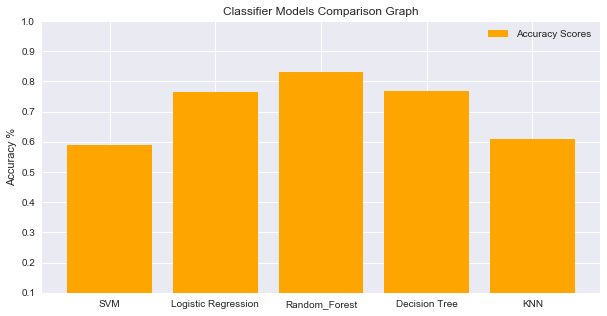

In [45]:
# Set the bar labels
bar_labels = ['SVM','Logistic Regression','Random_Forest','Decision Tree','KNN']

# Create the x position of the bars and give bar graph parameters
N=5
x_pos = np.arange(N)

# Create the plot bars
accuracy_scores=(svm_accuracy,logistic_accuracy,randomforest_accuracy,decisionTree_accuracy,knn_accuracy)

#We can plot other performance factors like F1-measures along with Accuracy, therefore we can use subplots.
fig, ax =plt.subplots(figsize=(10,5))

# Plot a bar graph. 
plt.bar([p for p in x_pos],# using the data from the mean_values
        accuracy_scores, 
        color='orange'
        )

# Set the chart's title
ax.set_title('Classifier Models Comparison Graph')

# set axes labels and title
ax.set_ylabel('Accuracy %')
ax.set_xticks([p for p in x_pos])
ax.set_xticklabels(bar_labels)
plt.ylim(0.1,1)
plt.legend(['Accuracy Scores'])
plt.show()

## Conclusion:

- From the above graph, it can be stated that the Ensemble approach using Random Forest algo is the best suit for this data, as it gives pretty good accuracy for the predictions.

- On the other hand, SVM and KNN does not perform well

- Logistic Regression and Decision Trees performs on the average level.

- So I would suggest of using Random Forest for the predictions for this data.

### References:
   
   
[1] : https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

[2] : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

[3] : https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f?gi=3a33aea7a918